In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shrutimehta/zomato-restaurants-data")

print("Path to dataset files:", path)

100%|██████████| 5.47M/5.47M [00:02<00:00, 2.35MB/s]

Extracting model files...


Path to dataset files: C:\Users\Xxqas\.cache\kagglehub\datasets\shrutimehta\zomato-restaurants-data\versions\2


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'zomato.csv'  # Assicurati che il file sia nella stessa directory
df = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
# Check NULL values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Given that there are some null values in "cuisine" columns, we drop this rows to avoid data import issues.

In [6]:
df = df.dropna()

# Check NULL values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

As we can see, the column names contain uppercase letters and spaces.

In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

To ensure compatibility and avoid potential issues in SQL queries, we convert all column names to lowercase and replace spaces with underscores.

In [7]:
# Clean columns name by changing to lower case and replacing whitespace with underscore
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Display the new column names
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

In [8]:
# General info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   restaurant_id         9542 non-null   int64  
 1   restaurant_name       9542 non-null   object 
 2   country_code          9542 non-null   int64  
 3   city                  9542 non-null   object 
 4   address               9542 non-null   object 
 5   locality              9542 non-null   object 
 6   locality_verbose      9542 non-null   object 
 7   longitude             9542 non-null   float64
 8   latitude              9542 non-null   float64
 9   cuisines              9542 non-null   object 
 10  average_cost_for_two  9542 non-null   int64  
 11  currency              9542 non-null   object 
 12  has_table_booking     9542 non-null   object 
 13  has_online_delivery   9542 non-null   object 
 14  is_delivering_now     9542 non-null   object 
 15  switch_to_order_menu  9542

In [9]:
# Display statistics of the dataset
df.describe()

,restaurant_id,country_code,longitude,latitude,average_cost_for_two,price_range,aggregate_rating,votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


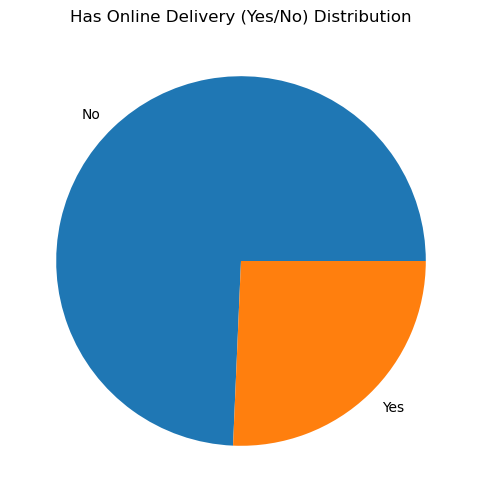

In [10]:
plt.figure(figsize=(8, 6))

# Count the occurrences of 'Yes' and 'No'
counts = df['has_online_delivery'].value_counts()

# Plot pie chart
plt.pie(counts, labels=["No", "Yes"])

# Title and labels
plt.title('Has Online Delivery (Yes/No) Distribution') 
plt.show()

Given that the data distribution was problematic, we dropped the following similar columns:
- `has_table_booking`
- `has_online_delivery`
- `is_delivering_now`
- `switch_to_order_menu`


Now that the dataset is properly formatted, we can proceed to the SQL queries by saving the final CSV and importing it into the SQL database.

In [11]:
df.to_csv("new_dataset.csv", index=False)